In [1]:
%matplotlib inline
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
dataset = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [3]:
print(dataset.train.labels.shape)
print(dataset.test.labels.shape)
print(dataset.validation.labels.shape)

(55000, 10)
(10000, 10)
(5000, 10)


In [4]:
print(dataset.train.labels[0:10])

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


In [5]:
dataset.train.cls = np.array([np.argmax(label) for label in dataset.train.labels])
dataset.test.cls = np.array([np.argmax(label) for label in dataset.test.labels])

In [6]:
image_size = 28
image_shape = (image_size, image_size)
image_flat = image_size*image_size
num_class = 10

In [7]:
x = tf.placeholder(tf.float32, [None, image_flat])

In [8]:
y = tf.placeholder(tf.float32, [None, num_class])

In [9]:
y_true_class = tf.placeholder(tf.int64, [None])

In [10]:
weight = tf.Variable(tf.zeros([image_flat, num_class]))

In [11]:
bias = tf.Variable(tf.zeros([num_class]))

In [12]:
logit = tf.matmul(x, weight) +  bias

In [13]:
y_pred = tf.nn.softmax(logit)

In [14]:
y_pred_class = tf.argmax(y_pred,dimension=1)

In [15]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = y, logits= logit)

In [16]:
cost = tf.reduce_mean(cross_entropy)

In [17]:
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

In [18]:
correct_prediction = tf.equal(y_pred_class,y_true_class)

In [19]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [20]:
sess = tf.Session()

In [21]:
sess.run(tf.global_variables_initializer())

In [22]:
BATCH_SIZE = 100

In [23]:
def optimization(num_iterations):
    for iteration in range(num_iterations):
        x_train,y_train = dataset.train.next_batch(BATCH_SIZE)
        feed_train_dict = {x:x_train, y:y_train}
        sess.run(optimizer, feed_dict = feed_train_dict)

In [24]:
feed_test_dict = {x:dataset.test.images,
                  y:dataset.test.labels,
                  y_true_class:dataset.test.cls
                  }

In [25]:
def accuracy_measure():
    acc =  sess.run(accuracy, feed_dict= feed_test_dict)
    print("Accuracy is {0}".format(acc))

### TODO
1. weight graphs
2. incorrect prediction
3. confusion matrix
4.  tensorboard for acccuracy, cost, bias and variance measurement on test, train and validation datasets

In [26]:
def display_weight():
    w = sess.run(weight)
    
    w_min = np.min(w)
    w_max = np.max(w)
    
    fig, axes = plt.subplots(3,4)
    fig.subplots_adjust(0.3,0.3)
    
    for i, ax in enumerate(axes.flat):
        if i< 10:
            image = w[:,i].reshape(image_shape)

            ax.set_xlabel("weight {0}".format(i))
            ax.imshow(image, vmin= w_min, vmax=w_max, cmap='seismic')
            
        ax.set_xticks([])
        ax.set_yticks([])
    

In [27]:
def display_image(image, true_label, pred_label=None):
    
    assert len(image) == len(true_label) ==9
    
    fig, axes = plt.subplots(3,3)
    fig.subplots_adjust(0.01,0.01)
    
    for i, ax in enumerate(axes.flat):
    
        image2 = image[i].reshape(image_shape)
        ax.imshow(image2, cmap='binary')
        
        if pred_label is not None:
            ax.set_xlabel("True {0}, Predicted : {1}".format(true_label[i],pred_label[i]))
        else:
            ax.set_xlabel("True {0}".format(true_label[i]))
                    
        
        ax.set_xticks([])
        ax.set_yticks([])

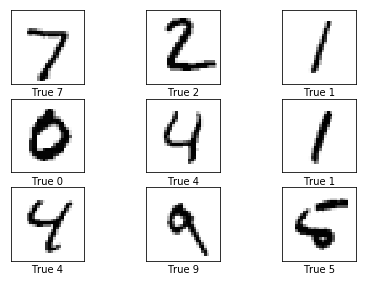

In [28]:
display_image(dataset.test.images[0:9], dataset.test.cls[0:9])
#dataset.test.images[0].reshape(28,28)

In [29]:
def error_output():
    y_pred_class2, correct_pred2 = sess.run([y_pred_class, correct_prediction], feed_dict = feed_test_dict)
    
    incorrect_classes_index = (correct_pred2 == False)
    
    images = dataset.test.images[incorrect_classes_index]
    
    true_class = dataset.test.cls[incorrect_classes_index]
    pred_class = y_pred_class2[incorrect_classes_index]
    display_image(images[0:9],true_class[0:9],  pred_class[0:9])
    

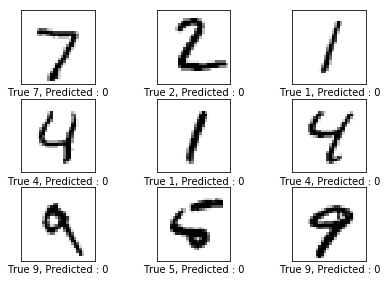

In [30]:
error_output()

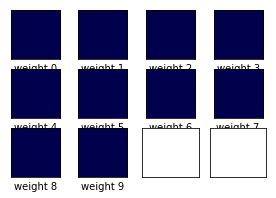

In [31]:
display_weight()

In [32]:
optimization(1)

In [33]:
accuracy_measure()

Accuracy is 0.4767000079154968


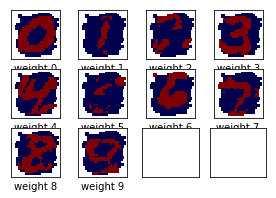

In [34]:
display_weight()

In [35]:
def print_confusion_matrix():
    y_pred_class2, y_true_class2 = sess.run([y_pred_class, y_true_class], feed_dict = feed_test_dict)
    
    cm = confusion_matrix(y_true_class2, y_pred_class2)
    print(cm)

In [36]:
print_confusion_matrix()

[[914   0   0   4   0   0  40   0  22   0]
 [  2 376   0 122   0   0 280   0 355   0]
 [168   0   0 280   7   0 347   1 227   2]
 [ 74   0   0 842  16   0  27   0  51   0]
 [ 33   0   0  54 628   0 208   0  48  11]
 [327   0   0 161  42   0  83   0 279   0]
 [110   0   0   1  15   0 826   0   6   0]
 [ 98   0   0  78 199   0  37 468 142   6]
 [ 31   0   0 207  35   0  24   0 677   0]
 [ 62   0   0 106 584   0  54   3 164  36]]


In [37]:
optimization(99)

In [38]:
accuracy_measure()

Accuracy is 0.892799973487854


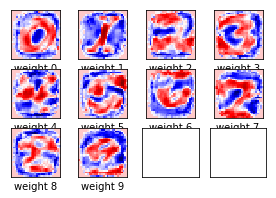

In [39]:
display_weight()

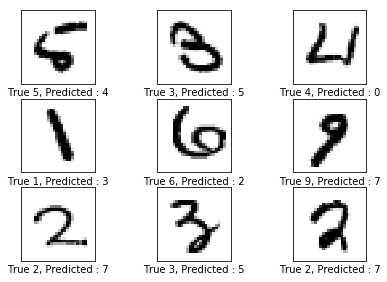

In [40]:
error_output()

In [41]:
print_confusion_matrix()

[[ 964    0    0    0    1    1    3    1    9    1]
 [   0 1116    2    2    0    3    4    1    7    0]
 [  28   25  873    7   14    2   11   25   43    4]
 [  12    5   23  814    2   68    2   22   48   14]
 [   2    7    9    0  903    0    8    2    6   45]
 [  24    4    4   19   16  741    7   15   53    9]
 [  25    4   16    0   14   23  858    0   17    1]
 [   3   16   19    2    9    0    0  945    2   32]
 [  17   16    6    7   13   17    2   23  847   26]
 [  13    7    1    4   54    6    0   45   12  867]]


In [42]:
optimization(900)

In [43]:
accuracy_measure()

Accuracy is 0.9214000105857849


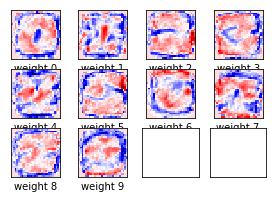

In [44]:
display_weight()

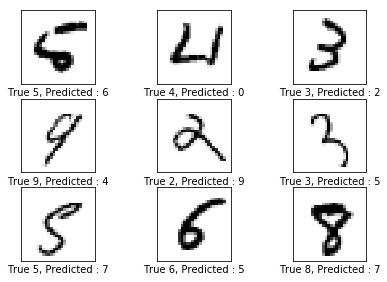

In [45]:
error_output()

In [46]:
print_confusion_matrix()

[[ 970    0    0    1    0    2    3    2    2    0]
 [   0 1110    4    2    0    2    4    2   11    0]
 [  15    7  921   15    9    3   13   11   33    5]
 [   4    0   20  906    3   30    1   13   25    8]
 [   2    1    3    0  930    0    7    6    5   28]
 [  11    2    3   23   12  787    9    8   29    8]
 [  20    3    5    1   17   18  889    2    3    0]
 [   2    6   22    5    8    0    0  953    1   31]
 [  13    8    7   17   12   33    7    9  854   14]
 [  14    6    1    8   47    7    0   26    6  894]]


In [47]:
#sess.close()